Text(0, 0.5, 'volt μV')

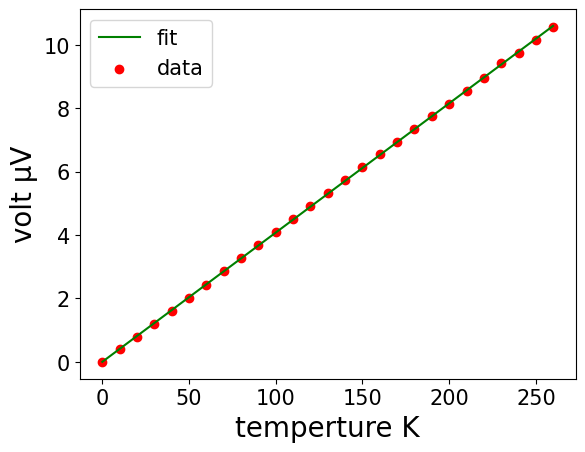

In [25]:
import math
import matplotlib.pyplot as plt
import numpy as np
t=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260]
v=[0,0.397,0.798,1.203,1.612,2.023,2.436,2.851,3.267,3.682,4.096,4.509,4.92,5.328,5.735,6.138,6.54,6.941,7.34,7.739,8.138,8.539,8.94,9.434,9.747,10.153,10.561]
delta=260/2600
n0=2600
n=len(t)
sumx=sum(t)
sumx2=sum(xi**2 for xi in t )
sumy=sum(v)
sum2y=sum(yi**2 for yi in v )
sumxy=sum(xi*yi for xi,yi in zip(t,v))
a1=(n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
a2=sumy/n-a1*sumx/n
line=[a1*delta*i+a2 for i in range(n0)]
xaxis=[delta*i for i in range(n0)]
plt.plot(xaxis,line,label='fit',color='green')
plt.scatter(t,v,label='data',color='red')
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.xlabel('temperture K',fontsize=20)
plt.ylabel('volt μV',fontsize=20)

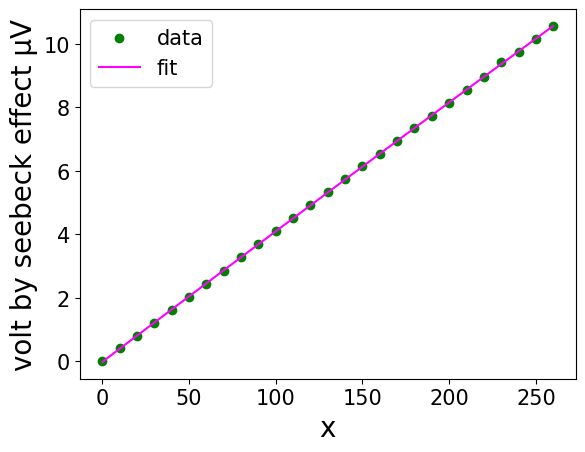

In [22]:
sumx3=sum(xi**3 for xi in t )
sumx4=sum(xi**4 for xi in t)
sumx2y=sum(xi**2*yi for xi,yi in zip(t,v))
nd_x=np.array(t)
nd_y=np.array(v)
nd1=np.array([[sumx2y],[sumxy],[sumy]])
nd_A=np.array([\
 [sumx4, sumx3, sumx2],\
 [sumx3, sumx2, sumx],\
 [sumx2, sumx, len(t)]\
    ])
nd_Ainv=np.linalg.inv(nd_A)#逆行列
a=nd_Ainv@nd1#行列積
a=np.linalg.solve(nd_A, nd1)#上記2行と同じ
a1=a[0]
a2=a[1]
a3=a[2]
nd_ys_fit=[a1*xi**2+a2*xi+a3 for xi in t]
plt.scatter(nd_x,nd_y,label='data',color='green')#numpyベクトルを指定可能
plt.plot(nd_x,nd_ys_fit,label='fit',color='magenta')#numpyベクトルを指定可能
plt.xlabel('x',fontsize=20)
plt.ylabel('volt by seebeck effect μV',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

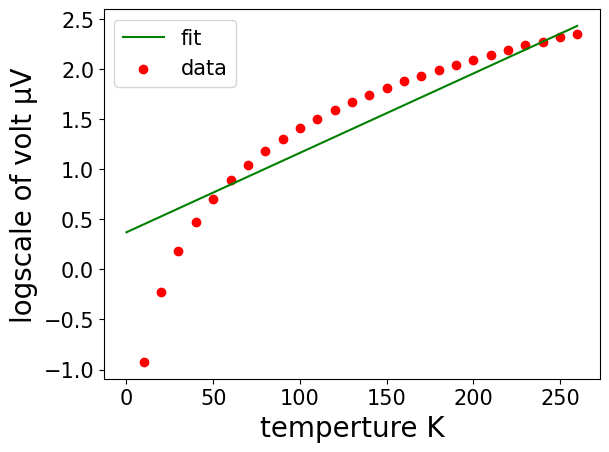

In [26]:
logy=[math.log(v[i+1]) for i in range(26) ]
sumx=sum(t)
t2=[t[i+1] for i in range(26)]
sumx2=sum(xi**2 for xi in t )
sumy=sum(logy)
sum2y=sum(yi**2 for yi in logy )
sumxy=sum(xi*yi for xi,yi in zip(t,logy))
a1=(n*sumxy-sumx*sumy)/(n*sumx2-sumx**2)
a2=sumy/n-a1*sumx/n
line=[a1*delta*i+a2 for i in range(n0)]
xaxis=[delta*i for i in range(n0)]
plt.plot(xaxis,line,label='fit',color='green')
plt.scatter(t2,logy,label='data',color='red')
plt.xlabel('temperture K',fontsize=20)
plt.ylabel('logscale of volt μV',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)

1回生のころに行った実験のデータを用いてクロメル・アルメル熱電対における温度とそこに流れる微小電流うの関係をフィッテイングした
この関係自体一次関数でおおよそ表されるので一次近似が一番よく近似できている。また、二次近似はおそらく二次の項の値がほとんど0である